# Object Detection Assessment Project Exercise
#### Russian License Plate Blurring
#### Welcome to your object detection project! Your goal will be to use Haar Cascades to blur license plates detected in an image!

#### Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?

#### OpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files (unfortunately, it does not come with license detectors for other countries!)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
car_plate = cv2.imread('../Images/.jpg')
car_plate = cv2.cvtColor(car_plate, cv2.COLOR_BGR2RGB)

In [65]:
def display(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

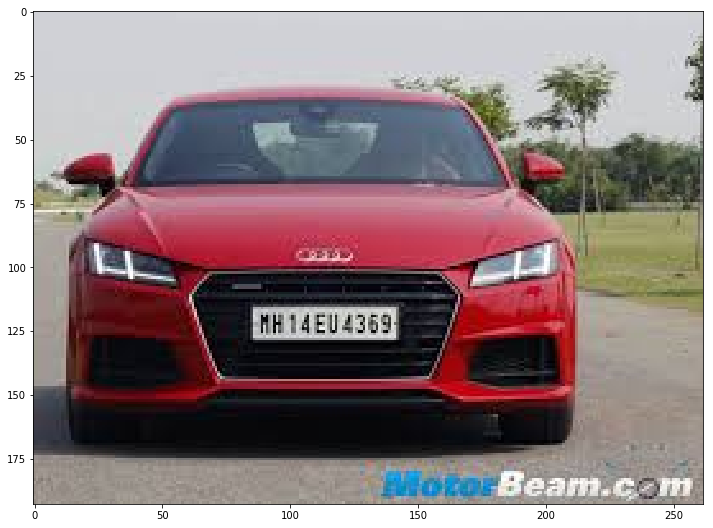

In [66]:
display(car_plate)

In [67]:
lic_plate = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_licence_plate_rus_16stages.xml')

In [68]:
def detect_plate(img):
    car_plate_copy = car_plate.copy()
    
    plate_rect = lic_plate.detectMultiScale(car_plate_copy)
    
    for (x, y, w, h) in plate_rect:
        cv2.rectangle(car_plate_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    return (car_plate_copy)

In [69]:
result = detect_plate(car_plate)

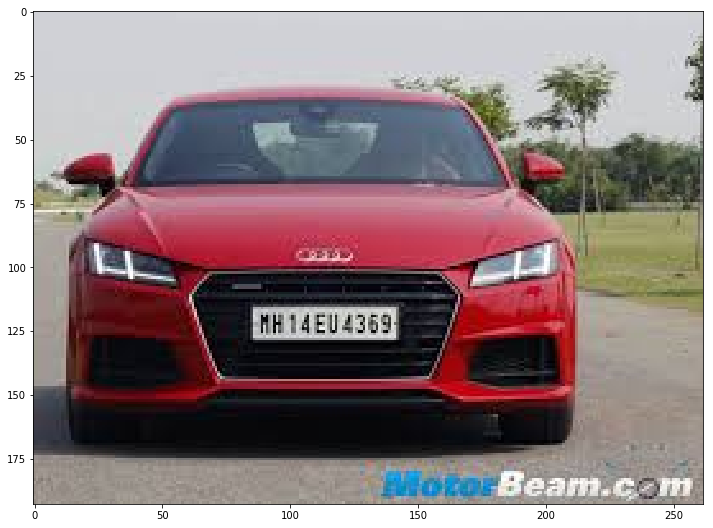

In [70]:
display(result)

In [54]:
def detect_and_blur_plate(img):
    car_plate_copy = car_plate.copy()
    roi = car_plate.copy()
    
    plate_rect = lic_plate.detectMultiScale(car_plate_copy)
    
    for (x, y, w, h) in plate_rect:
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, ksize=7)
        
        car_plate_copy[y:y+h, x:x+w] = blurred_roi
        
    return (car_plate_copy)

In [55]:
result = detect_and_blur_plate(car_plate)

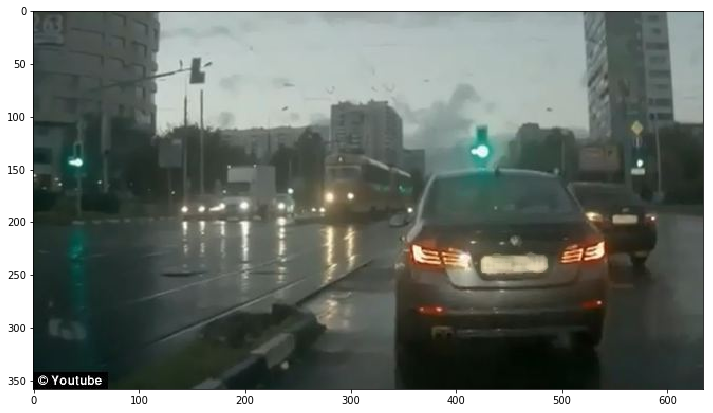

In [56]:
display(result)